# 파이썬을 이용한 시계열 분석 - 예제와 함께하는 포괄적인 가이드

[Time Series Analysis in Python – A Comprehensive Guide with Examples](https://www.machinelearningplus.com/time-series/time-series-analysis-python/)

<br>

*시계열(Time series)은 일정한 시간 간격으로 기록된 관측의 순서다. 이 가이드는 파이썬으로 주어진 시계열의 특성을 분석하는 과정을 안내한다.*

<brR>

## 목차

1. [시계열이란 무엇인가?](#1)
2. [파이썬에서 시계열 데이터를 어떻게 불러오는가?](#2)
3. [panel 데이터란 무엇인가?](#3)
4. [시계열 시각화](#4)
5. [시계열의 패턴](#5)
6. [시계열 데이터 더하기 및 곱하기](#6)
7. [시계열을 구성요소(components)로 분해(decompose)하는 방법](#7)
8. [정상(stationary) & 비정상(non-stationary) 시계열](#8)
9. [정상 시계열 만드는 방법](#9)
10. [정상성을 검정하는 방법](#10)
11. [백색잡음(white noise)과 정상 시계열의 차이점](#11)
12. [시계열에서 추세 제거(detrend)하는 방법](#12)
13. [시계열에서 계절성 제거(deseasonalize)하는 방법](#13)
14. [시계열의 계절성을 검정하는 방법](#14)
15. [시계열 데이터의 결측값 다루는 방법](#15)
16. [자기상관함수(autocorrelation function)와 부분자기상관함수(partial autocorrelation function)](#16)
17. [부분자기상관함수 계산하는 방법](#17)
18. [Lag 그래프](#18)
19. [시계열의 예측가능성(forecastability)을 제거하는 방법](#19)
20. [시계열을 평활화(smoothen)하는 이유와 방법](#20)
21. [한 시계열이 다른 시계열을 예측하는 데 도움이 되는 지 확인하기 위해 그래인저 인과관계(Granger Causality) 검정을 하는 방법](#21)
22. [다음은 무엇인가?](#22)

<br>
<a id="1"></a>

# 1. 시계열이란 무엇인가?

시계열(Time series)은 일정한 시간 간격으로 기록된 관측의 순서다.  
  
  
관측 빈도에 따라 시계열은 일반적으로 매시간, 일, 주, 월, 분기 및 연간이 될 수 있다. 클릭 횟수나 분당 사용자 방문 등 초 및 분 단위 시계열도 있을 수 있다.  
  
  
왜 시계열 분석을 하는 것일까?  
  
  
왜냐하면 그것은 시리즈(series) 예측을 개발하기 전의 준비 단계(preparatory)이기 때문이다.  
  
  
게다가 시계열 예측은 수요와 판매, 웹사이트 방문자 수, 주가 등과 같은 사업에 중요한 것들이 본질적으로 시계열 데이터이기 때문에 엄청난 상업적 의미를 가진다.  
  
  
그렇다면 시계열 분석에는 어떤 것이 포함되는가?  
  
  
시계열 분석에는 시리즈 고유의 특성에 대한 다양한 측면을 이해하여 의미 있고 정확한 예측을 작성하는 데 더 많은 정보를 얻을 수 있도록 해야 한다.

<br>
<a id="2"></a>

# 2. 파이썬에서 시계열 데이터를 어떻게 불러오는가?

시계열 데이터를 어떻게 불러올까?  
  
  
시계열의 데이터는 일반적으로 `.csv` 파일 또는 다른 스프레드시트 형식으로 저장되며 날짜와 측정값의 두 열을 포함한다.  
  
  
pandas 패키지의 `read_csv()`를 사용하여 시계열 데이터 세트(호주 의약품 판매에 대한 csv 파일)를 pandas 데이터프레임으로 읽어보자. `parse_dates=['date']` 인자를 추가하면 날짜 열이 `date` 필드로 지정된다.

In [1]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10,7), 'figure.dpi': 120})

In [2]:
# Import as Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
                 parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


다른 방법으로, `date`를 인덱스로 갖는 pandas 시리즈로 임포트할 수도 있다. `pd.read_csv()`에 `index_col` 인자를 명시하면 된다.

In [3]:
ser = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
                   parse_dates=['date'],
                   index_col='date'
                 )
ser.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


시리즈에서는 이것이 시리즈임을 암시하기 위해 'value' 컬럼이 'date' 보다 높게 위치한다.

<br>
<a id="3"></a>

# 3. panel 데이터란 무엇인가?

panel 데이터도 시간 기반의 데이터셋이다.  
  
  
차이점은 시계열 외에도 같은 시간 동안 측정된 하나 이상의 관련 변수를 포함하고 있다는 것이다.  
  
  
일반적으로 패널 데이터 안에 있는 컬럼들은 Y를 예측하는 데 도움이되는 설명 변수들을 포함하고, 이러한 컬럼들은 미래 예측 기간으로 이용된다.  
  
  
패널 데이터의 예는 다음과 같다.

In [4]:
# dataset source: https://github.com/rouseguy
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df = df.loc[df.market == 'MUMBAI', :]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


<br>
<a id="4"></a>

# 4. 시계열 시각화

`matplotlib` 을 이용하여 시리즈를 시각화해보자.

In [5]:
# Time series data source: fpp package in R.
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
                 parse_dates=['date'],
                 index_col='date')

In [6]:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [7]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100) :
    
    plt.figure(figsize=(16, 5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

C:\Users\shkim\AppData\Local\conda\conda\envs\python36\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


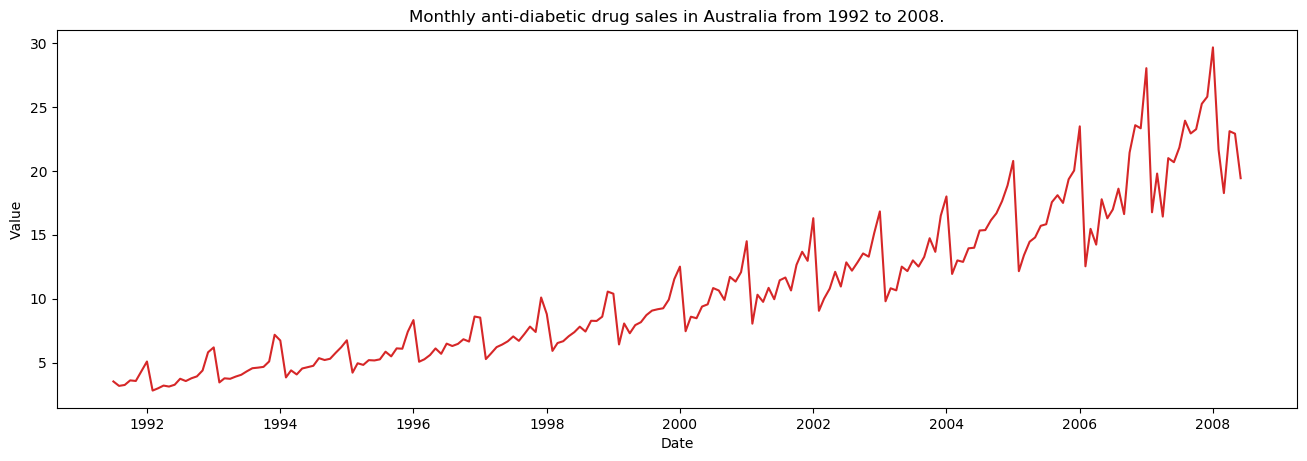

In [8]:
plot_df(df, 
        x=df.index, 
        y=df.value, 
        title="Monthly anti-diabetic drug sales in Australia from 1992 to 2008.")

모든 값들이 양수이기 때문에 당신은 Y축 양쪽으로 성장을 강조하는 모습을 볼 수 있다.

In [13]:
# Import data
df = pd.read_csv('datasets/AirPassengers.csv', parse_dates=['Month'])
x = df['Month'].values
y1 = df['#Passengers'].values

df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


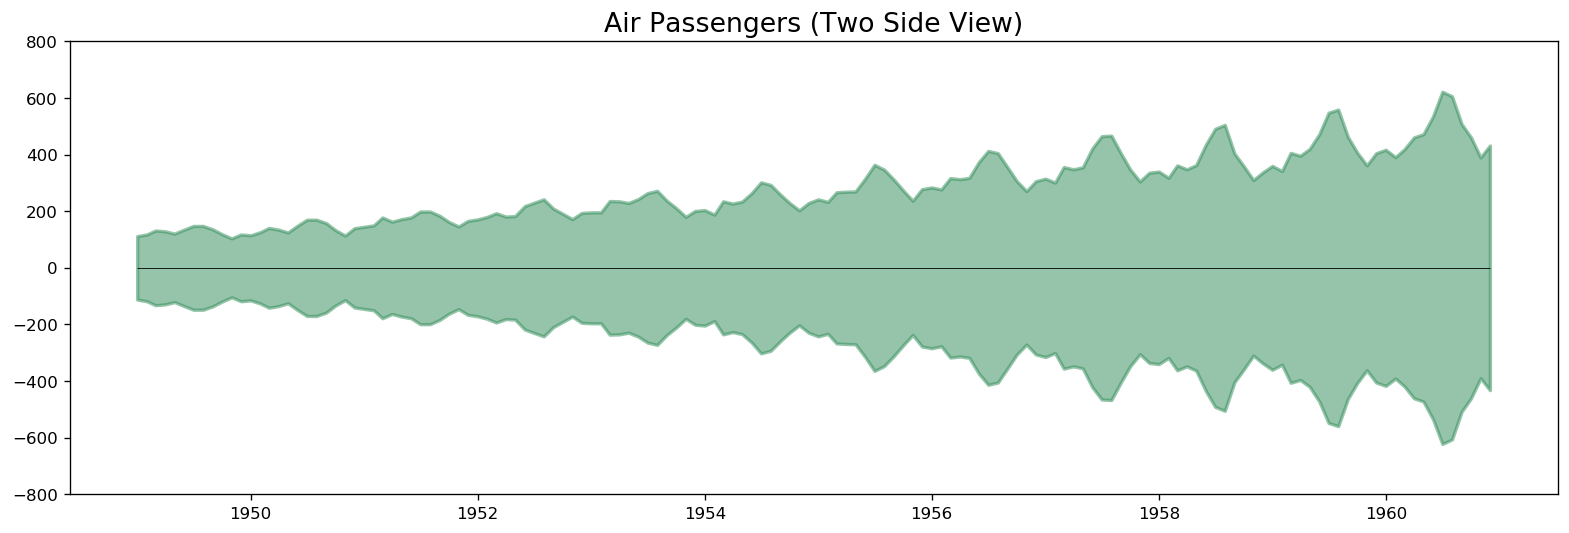

In [19]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(16, 5), dpi=120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.Month), xmax=np.max(df.Month), linewidth=.5)
plt.show()

이것이 월별 시계열이고 매년 일정한 반복 패턴을 나타내므로, 매년을 같은 플롯에 분리하여 그릴 수 있다. 이는 연도별 타당한 패턴을 나란히 비교할 수 있다.

<br>

## 4.1 시계열의 Seaborn Plot 

In [21]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [22]:
# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()
years

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008], dtype=int64)

In [24]:
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()),
                            len(years),
                            replace=False)
mycolors

array(['xkcd:vivid purple', 'xkcd:bright lavender', 'xkcd:sapphire',
       'xkcd:dark fuchsia', 'xkcd:dusky pink', 'xkcd:dusty purple',
       'xkcd:dark tan', 'xkcd:orange brown', 'xkcd:red orange',
       'xkcd:clear blue', 'xkcd:lemon', 'xkcd:bluish grey',
       'xkcd:dark blue grey', 'xkcd:pale violet', 'xkcd:orangey yellow',
       'xkcd:cool grey', 'xkcd:green', 'xkcd:ice'], dtype='<U31')

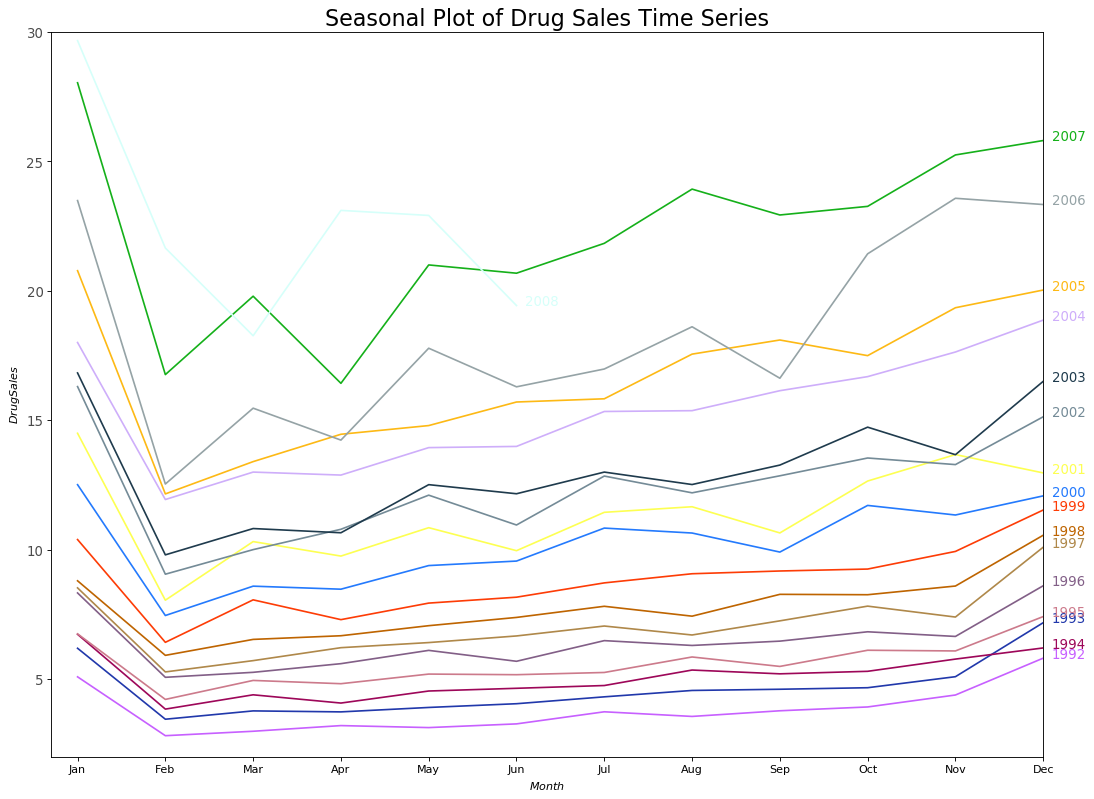

In [30]:
# Draw Plot
plt.figure(figsize=(16,12), dpi=80)

for i, y in enumerate(years):
    if i > 0:
        plt.plot('month', 'value', data=df.loc[df.year == y, :],
                 color=mycolors[i], label=y)
        plt.text(df.loc[df.year == y, :].shape[0]-.9,
                 df.loc[df.year == y, 'value'][-1:].values[0],
                 y,
                 fontsize=12, color=mycolors[i])
        
# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30),
              ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

매년 2월이면 마약 판매량이 급감해 3월에 다시 상승하고 4월에 다시 하락하고 있다. 분명히 이 패턴은 매년 일정하게 반복된다.

하지만, 세월이 흐르면서 마약 판매는 전반적으로 증가한다. 이러한 마약 판매의 트렌드와 연도별로 어떻게 변화하는 지를 멋진 연단위로 잘 시각화할 수 있다. 마찬가지로 월별 분포를 시각화하기 위해 한 달 단위로 box plot을 그릴 수 있다.

<br>

## 4.2 월별(계절성) 그리고 년도별(트렌트) 분포의 Boxplot

계절 간격으로 데이터를 그룹화하여 해당 연도 또는 월별로 데이터가 어떻게 분포되는 지, 시간에 따라 비교를 할 수 있다.

In [31]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

In [32]:
# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime("%b") for d in df.date]
years = df['year'].unique()

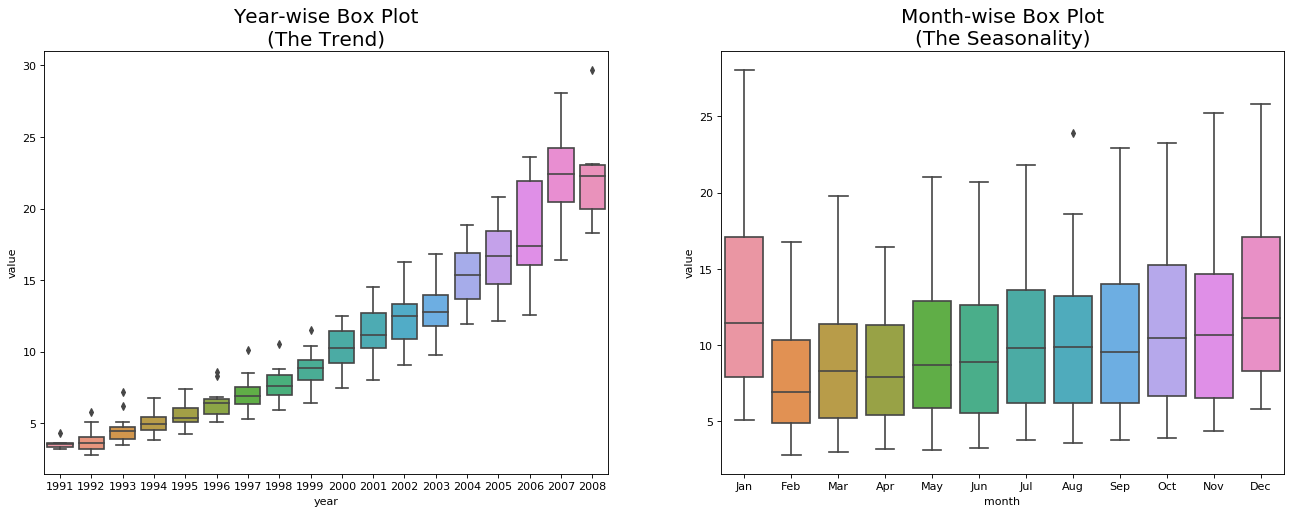

In [37]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20, 7), dpi=80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title("Year-wise Box Plot\n(The Trend)", fontsize=18)
axes[1].set_title("Month-wise Box Plot\n(The Seasonality)", fontsize=18)

plt.show()

box plot은 1년 그리고 1개월마다의 분포를 뚜렷하게 보인다. 또한 월별 box plot에서는 12월과 1월은 분명하게 마약 판매량이 더 높으며, 이는 휴가 할인 시즌에 기인한다고 볼 수 있다.

지금까지 우리는 그 패턴을 식별하는 유사점을 보았다. 자, 어떻게 하면 일반적인 패턴의 편차를 알아낼 수 있을까?

<br>
<a id="5"></a>

# 5. 시계열의 패턴